Prueba de etiquetado de precios

In [162]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
data=pd.read_csv('DatosProcesados.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ancho            205 non-null    float64
 1   POM              205 non-null    int64  
 2   NúmeroCilindros  205 non-null    float64
 3   TamañoMotor      205 non-null    int64  
 4   HP               205 non-null    int64  
 5   Precio           205 non-null    float64
 6   Gama             205 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 11.3+ KB


<Axes: xlabel='Precio', ylabel='Count'>

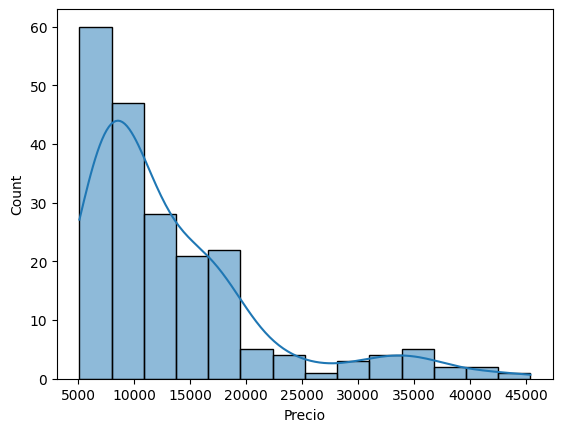

In [3]:
sns.histplot(data=data, x='Precio',kde=True,cbar=True)

# Modelo de regresión 

Implementar un modelo de regresión con aprendizaje supervisado que permita predecir el precio final de los vehículos, utilizando los datos que se han puesto a su disposición.

In [263]:
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

La siguiente celda se usa para evitar que salgan los warnings en el cálculo de los errores en sklearn.

In [276]:
import warnings
from warnings import simplefilter

# Ignorar los warnings de deprecación
simplefilter(action='ignore', category=FutureWarning)

Extraemos del dataframe **data** los datos que necesitamos para entrenar y testear el modelo, siendo **x_data** las variables e **y_data** en este caso sería la salida para el modelo de regresión. 

In [234]:
total=len(data.columns)
x_data=data.iloc[:,:total-2]
y_data=data.iloc[:,total-2:total-1]

Ahora pasamos a reescalar los datos debido a la diferencia entre los rangos de los valores de las columnas. Debido a la falta de valores atípicos se decide elegir el método de escalado **MinMax** para las variables

In [235]:
scaler=MinMaxScaler()
x_data=scaler.fit_transform(x_data)
y_data=scaler.fit_transform(y_data)

Se procede ahora a dividir el total de los datos en dos grupos **train** y **test** donde el primero es el que se usará para el entrenamiento de los modelos y el segundo se utilizará para validar el modelo y ver el error que se tiene

In [236]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=42)

Comenzaremos a probar con diferentes modelos para ver cual es el que mejor se adapta a este casoç

## Regresión lineal

In [278]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_predict=lin_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

MSE:  0.009569701783690265
RMSE:  0.09782485258711236
R2 Score:  0.7758776702865369


## Regresión Ridge

In [279]:
ridge_reg=Ridge(alpha=1.30)
ridge_reg.fit(x_train,y_train)
y_predict=ridge_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

MSE:  0.010152927264694632
RMSE:  0.10076173512149655
R2 Score:  0.7622185347663757


## Regresión Lasso

In [280]:
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(x_train,y_train)
y_predict=lasso_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

MSE:  0.042815591758192044
RMSE:  0.2069192880284292
R2 Score:  -0.002740773935190788


## Regresión polinómica

In [287]:
#grado del polinomio
degree=2
poly_reg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
poly_reg.fit(x_train,y_train)
y_predict=poly_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

MSE:  0.006740261557860152
RMSE:  0.08209909596250224
 R2 Score:  0.8421431349302527


## Regresión de Árbol de desición

In [282]:
trre_reg=DecisionTreeRegressor(max_depth=6, criterion='squared_error')
trre_reg.fit(x_train,y_train)
y_predict=trre_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

MSE:  0.0034537852774167857
RMSE:  0.05876891420995275
R2 Score:  0.9191123798628746


## Vectores de soporte

In [286]:
svm_reg=SVR(kernel='rbf',C=1.0, epsilon=0.01)
svm_reg.fit(x_train,y_train)
y_predict=svm_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

MSE:  0.007570631017022112
RMSE:  0.08700937315612677
R2 Score:  0.8226958896642126


c:\Users\juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Se puede ver en la siguiente tabla de errores que el modelo con el menor R2 score es de *Regresión del Árbol de decisión*.

|Error|Lineal|Ridge|Lasso|Polinómica|Árbol|SVR|
|-----|------|-----|-----|----------|-----|---|
|MSE|  0.00957|0.01015|0.04282|0.00674|0.00345|0.00757|
|RMSE|  0.09782|0.10076|0.20692|0.08210|0.05877| 0.08701|
|R2 Score| 0.77588|0.76222|-0.00274|0.84214|0.91911|0.82270|

# Modelo de clasificación

Implementar un modelo de clasificación con aprendizaje supervisado que permita clasificar el precio de los vehículos en baratos y caros usando la mediana de los precios como punto de corte, utilizando los datos que se han puesto a su disposición.

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [311]:
total=len(data.columns)
x=data.iloc[:,total-2:total-1]
y=data.iloc[:,total-1:]

Debido a que los datos fueron dividos en gama *Alta* y *Baja* en base a la mediana tenemos practicamente la misma cantidad de datos en ambos grupos, solo tenemos unos mas en el de los vehículos de gama alta.

<Axes: xlabel='Gama', ylabel='count'>

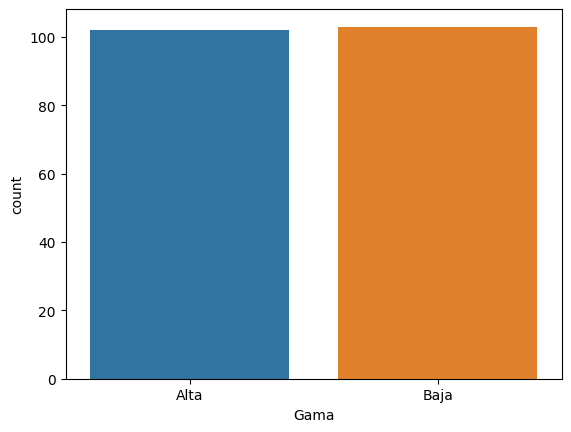

In [310]:
sns.countplot(data=y, x='Gama', hue='Gama')

Realizamos el mimso procedimiento con los datos para tener un subset de datos para entrenar y otro para validarlo

In [313]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=40)

## Regresion Logística

In [317]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_predict=log_reg.predict(x_test)

c:\Users\juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


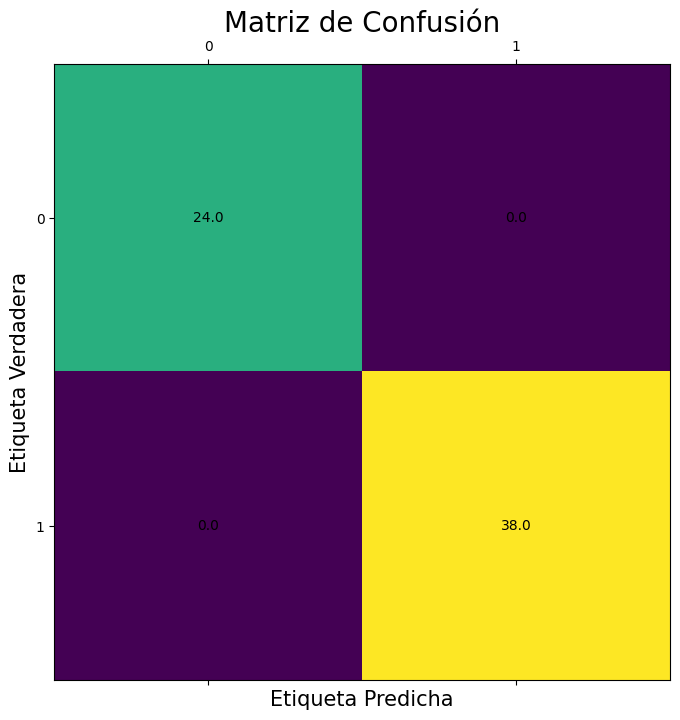

In [320]:
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [322]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00        24
        Baja       1.00      1.00      1.00        38

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

